# Для разных концентраций соли оценить Дебаевский радиус и сравнить его с расстоянием между слоями

In [10]:
from math import pi
from math import sqrt

import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA
from scipy.signal import find_peaks

import matplotlib.cm as cm

from create_in import create_in
from out_reader import out_reader
import numpy as np

lb = 0.7

In [11]:
# Cs_range = [0.008, 0.013, 0.0166, 0.0196, 0.023, 0.027]

Cs_range = [0.027, 0.035, 0.045, 0.05, 0.054, 0.06]

kappa = [1/sqrt(8 * pi * lb * Cs) for Cs in Cs_range]
print(kappa)

[1.4509390459189389, 1.2743743686805509, 1.123892552241226, 1.0662180931146155, 1.025968838457621, 0.9733195013650308]


In [12]:
# pow(10, -2) * 1.66

N = 600

S_namics = 50

alpha = 0.4

Cs = Cs_range[3]

chi = 2.2

chi_ions = chi

In [13]:
file_name_pro = create_in(
        range_param = 'chi',
        min_val = 0,
        max_val = 2,
        Cs = Cs,
        chi_first_try = 0.5,
        chi_ions_first_try = 0.5,
        chi_surf_first_try = 0.5,
        N_layers_first_try = N - 250,
        N_first_try = N,

        S = S_namics,
        alpha = alpha,
        Kuhn = '1e-09',
        initial_cond = True,
        
        N_layers = N - 250,
        N = N,
        chi = chi,
        chi_ions = chi_ions,
        chi_surf = chi,
    )
psi, q, phi_brush, phi_end_brush, phi_Na, phi_Cl, phi_W = out_reader(alpha = alpha,file_names=file_name_pro)

No output defined! 
No output defined! 
Problem nr 1 out of 2
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.270883e+00 |g| = 6.014344e+00 alpha = 1.000000e+00 
hessian scaling: 1.64516
it =  1  E = 2.070799e+00 |g| = 5.501328e+00 alpha = 1.166269e-01 
it =  2  E = 2.527344e+00 |g| = 6.005227e+00 alpha = 8.078875e-02 
it =  3  E = 4.730718e+00 |g| = 5.491101e+00 alpha = 1.952126e-02 
it =  4  E = 7.410406e+00 |g| = 5.576127e+00 alpha = 7.565611e-03 
it =  5  E = 3.090688e+00 |g| = 5.249762e+00 alpha = 3.851385e-02 
it =  6  E = 4.921255e+00 |g| = 5.186888e+00 alpha = 1.410242e-02 
it =  7  E = 4.868450e+00 |g| = 5.113509e+00 alpha = 1.338734e-02 
it =  8  E = 4.325219e+00 |g| = 4.880216e+00 alpha = 1.528143e-02 
it =  9  E = 2.425066e+00 |g| = 5.045313e+00 alpha = 4.779115e-02 
it = 

Расстояния между пиками: [5 6 7 5 5]


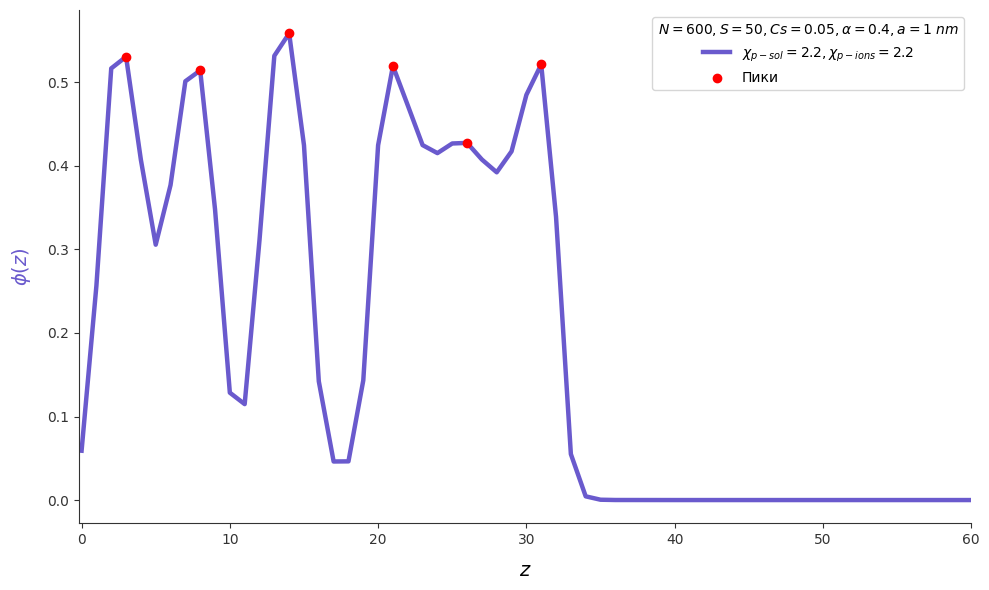

In [16]:
peaks, _ = find_peaks(phi_brush, prominence=0.01)

# Создаем фигуру
fig, ax1 = plt.subplots(figsize=(10, 6))  # Основная ось

# Первый график для phi_brush
ax1.plot(phi_brush, color='slateblue', label=f'$\\chi_{{p-sol}} = {chi}, \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, linestyle="-")
ax1.scatter(peaks, phi_brush[peaks], color='red', zorder=3, label="Пики")
ax1.set_xlabel("$z$", fontsize=14, labelpad=10)
ax1.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10, color='slateblue')
ax1.tick_params(axis='y', labelcolor='slateblue')
ax1.set_xlim(-0.2, 60)

# Убираем верхнюю и правую границы
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("#333333")
ax1.spines["bottom"].set_color("#333333")
ax1.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Легенда для первого графика
ax1.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
           title_fontsize=10, loc="upper right")

peak_distances = np.diff(peaks)
print("Расстояния между пиками:", peak_distances)

# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()
